In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import requests
warnings.filterwarnings("ignore")

In [16]:
api_key = 'dbc3b3f3a7c64caf9528506a2a9bcc8e'
symbol='BTC/USD'
interval='5min'
order='asc'
start_date='2023-04-02 00:00:00'
end_date='2023-04-20 00:00:00'

api_url=f'https://api.twelvedata.com/time_series?symbol={symbol}&start_date={start_date}&end_date={end_date}&interval={interval}&order={order}&apikey={api_key}'

In [15]:
data = requests.get(api_url).json()
data_final=pd.DataFrame(data['values'])
data_final

,datetime,open,high,low,close
0,2023-04-02 15:25:00,28150.55078,28164.10938,28127.24023,28127.24023
1,2023-04-02 15:30:00,28128.56055,28150.99023,28085.27930,28150.99023
2,2023-04-02 15:35:00,28147.18945,28150.99023,28126.36914,28150.00977
3,2023-04-02 15:40:00,28150.00977,28150.00977,28107.03906,28112.56055
4,2023-04-02 15:45:00,28114.74023,28140.85938,28102.31055,28131.94922
...,...,...,...,...,...
4995,2023-04-19 23:40:00,28742.02000,28800.00000,28687.29000,28789.47000
4996,2023-04-19 23:45:00,28789.47000,28858.42000,28785.00000,28820.58000
4997,2023-04-19 23:50:00,28822.17000,28845.53000,28745.00000,28808.30000
4998,2023-04-19 23:55:00,28805.92000,28877.36000,28801.45000,28809.72000


In [7]:
data_final.shape

(5000, 5)

In [8]:
data_final.isnull().sum()

datetime    0
open        0
high        0
low         0
close       0
dtype: int64

In [11]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   datetime  5000 non-null   object
 1   open      5000 non-null   object
 2   high      5000 non-null   object
 3   low       5000 non-null   object
 4   close     5000 non-null   object
dtypes: object(5)
memory usage: 195.4+ KB


In [12]:
data_final.describe()

,datetime,open,high,low,close
count,5000,5000,5000,5000,5000
unique,5000,4936,4856,4855,4946
top,2023-04-02 15:25:00,30393.53000,30000.00000,27900.00000,27939.17000
freq,1,3,8,6,2


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data_final['close'].values.reshape(-1,1))

In [ ]:
scaled_data

array([[0.19492198],
       [0.20158222],
       [0.20130727],
       ...,
       [0.38591224],
       [0.38631045],
       [0.38737329]])

In [ ]:
scaled_data.shape

(5000, 1)

In [ ]:
time_intervals_to_train = 24
prediction_interval = 12

In [ ]:
x_train = []
y_train = []

In [ ]:
for i in range(time_intervals_to_train,len(scaled_data)-prediction_interval):
    x_train.append(scaled_data[i-time_intervals_to_train: i,0])
    y_train.append(scaled_data[i+prediction_interval,0])
    
x_train=np.array(x_train)
y_train=np.array(y_train)

In [ ]:
x_train.shape

In [ ]:
y_train.shape

In [ ]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [ ]:
model=Sequential()
model.add(LSTM(128, return_sequences=True, input_shape = (x_train.shape[1],1),activation='relu')) 
model.add(Dropout(0.4)) 
model.add(LSTM(64,return_sequences=True,activation='relu'))
model.add(Dropout(0.3)) 
model.add(LSTM(32,activation='relu')) 
model.add(Dropout(0.2)) 
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 128)           66560     
                                                                 
 dropout (Dropout)           (None, 24, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 24, 64)            49408     
                                                                 
 dropout_1 (Dropout)         (None, 24, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 3

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
78/78 [==============================] - 14s 102ms/step - loss: 0.0261 - accuracy: 4.0290e-04
Epoch 2/10
78/78 [==============================] - 8s 96ms/step - loss: 0.0039 - accuracy: 4.0290e-04
Epoch 3/10
78/78 [==============================] - 8s 105ms/step - loss: 0.0036 - accuracy: 4.0290e-04
Epoch 4/10
78/78 [==============================] - 7s 90ms/step - loss: 0.0034 - accuracy: 4.0290e-04
Epoch 5/10
78/78 [==============================] - 8s 107ms/step - loss: 0.0034 - accuracy: 4.0290e-04
Epoch 6/10
78/78 [==============================] - 8s 105ms/step - loss: 0.0032 - accuracy: 4.0290e-04
Epoch 7/10
78/78 [==============================] - 7s 93ms/step - loss: 0.0034 - accuracy: 4.0290e-04
Epoch 8/10
78/78 [==============================] - 8s 107ms/step - loss: 0.0030 - accuracy: 4.0290e-04
Epoch 9/10
78/78 [==============================] - 7s 92ms/step - loss: 0.0030 - accuracy: 4.0290e-04
Epoch 10/10
78/78 [==============================] - 9s 116ms/step 

In [ ]:
test_start='2023-04-21 00:00:00'
test_end='2023-04-23 00:00:00'

test_api_url=f'https://api.twelvedata.com/time_series?symbol={symbol}&start_date={test_start}&end_date={test_end}&interval={interval}&order={order}&apikey={api_key}'

test_data = requests.get(test_api_url).json()
test_data_final=pd.DataFrame(test_data['values'])
test_data_final

,datetime,open,high,low,close
0,2023-04-21 00:00:00,28248.18000,28292.67000,28222.00000,28285.98000
1,2023-04-21 00:05:00,28285.00000,28316.24000,28266.76000,28287.17000
2,2023-04-21 00:10:00,28281.45000,28307.25000,28268.17000,28276.97000
3,2023-04-21 00:15:00,28286.93945,28303.64000,28266.12000,28285.17000
4,2023-04-21 00:20:00,28285.17000,28303.28906,28189.35000,28206.11000
...,...,...,...,...,...
572,2023-04-22 23:40:00,27839.86914,27860.76000,27835.31000,27844.72000
573,2023-04-22 23:45:00,27842.47000,27844.18000,27811.54000,27822.54000
574,2023-04-22 23:50:00,27821.93000,27829.99000,27803.00000,27825.71000
575,2023-04-22 23:55:00,27827.10000,27828.50000,27809.61000,27821.41000


In [ ]:
test_data_final['close']

0      28285.98000
1      28287.17000
2      28276.97000
3      28285.17000
4      28206.11000
          ...     
572    27844.72000
573    27822.54000
574    27825.71000
575    27821.41000
576    27811.17000
Name: close, Length: 577, dtype: object

In [ ]:
bitcoin_prices= pd.to_numeric(test_data_final['close'],errors='coerce').values

In [ ]:
test_inputs=test_data_final['close'].values
test_inputs=test_inputs.reshape(-1,1)
model_inputs=scaler.fit_transform(test_inputs)

In [ ]:
model_inputs

array([[0.94635337],
       [0.94736173],
       [0.93871862],
       [0.945667  ],
       [0.87867438],
       [0.82049435],
       [0.80253023],
       [0.9339988 ],
       [0.93486311],
       [1.        ],
       [0.9846966 ],
       [0.94680247],
       [0.92171201],
       [0.87258183],
       [0.9083745 ],
       [0.89941786],
       [0.93127028],
       [0.91528899],
       [0.90685699],
       [0.90931508],
       [0.89276605],
       [0.90028165],
       [0.88816486],
       [0.8742003 ],
       [0.88665655],
       [0.90122275],
       [0.90927271],
       [0.89663003],
       [0.89441841],
       [0.84810148],
       [0.86129494],
       [0.88691076],
       [0.88630914],
       [0.8982146 ],
       [0.88802081],
       [0.91413658],
       [0.93471058],
       [0.91665325],
       [0.93796446],
       [0.95131045],
       [0.94982756],
       [0.9589791 ],
       [0.94067603],
       [0.96735105],
       [0.95125961],
       [0.96857126],
       [0.97053714],
       [0.976

In [ ]:
x_test=[]
for x in range(time_intervals_to_train, len(model_inputs)):
    x_test.append(model_inputs[x - time_intervals_to_train:x, 0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
prediction_prices=model.predict(x_test)
prediction_prices=scaler.inverse_transform(prediction_prices)

18/18 [==============================] - 1s 20ms/step


In [ ]:
prediction_prices

array([[28203.768],
       [28201.988],
       [28200.299],
       [28199.066],
       [28197.814],
       [28198.102],
       [28199.133],
       [28199.713],
       [28196.855],
       [28193.879],
       [28189.533],
       [28186.014],
       [28183.838],
       [28182.744],
       [28183.033],
       [28182.713],
       [28182.969],
       [28182.982],
       [28184.053],
       [28185.85 ],
       [28188.223],
       [28191.326],
       [28194.54 ],
       [28198.242],
       [28202.393],
       [28206.43 ],
       [28210.283],
       [28214.184],
       [28218.379],
       [28222.547],
       [28227.406],
       [28231.57 ],
       [28234.791],
       [28237.588],
       [28239.648],
       [28241.389],
       [28242.01 ],
       [28241.705],
       [28241.281],
       [28239.92 ],
       [28237.902],
       [28235.54 ],
       [28232.674],
       [28229.959],
       [28226.53 ],
       [28223.328],
       [28219.705],
       [28215.965],
       [28211.879],
       [28207.219],


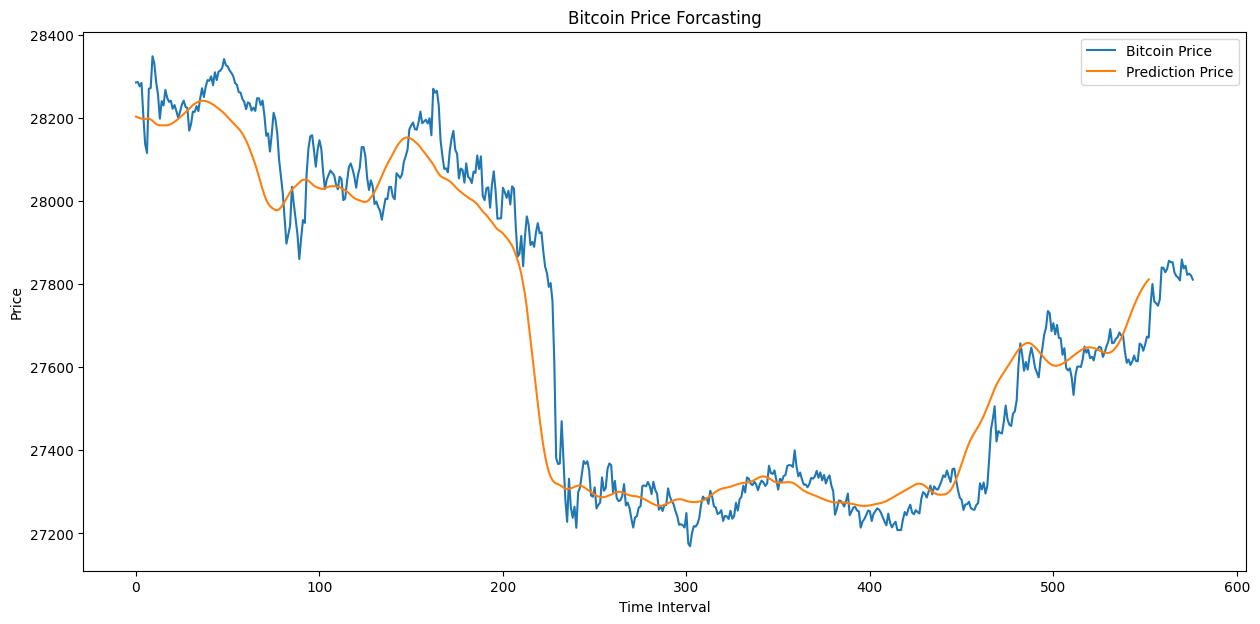

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(bitcoin_prices, label='Bitcoin Price')
plt.plot(prediction_prices, label='Prediction Price')
plt.title('Bitcoin Price Forcasting')
plt.xlabel('Time Interval')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
last_data=model_inputs[len(model_inputs)+0 - time_intervals_to_train:len(model_inputs)+1,0]
last_data=np.array(last_data)

In [ ]:
last_data=np.reshape(last_data,(1,last_data.shape[0],1))

In [ ]:
prediction=model.predict(last_data)

1/1 [==============================] - 0s 40ms/step


In [ ]:
prediction=scaler.inverse_transform(prediction)

In [ ]:
prediction

array([[27816.209]], dtype=float32)